In [6]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk

In [28]:

from nltk.corpus import stopwords
from nltk import tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import gutenberg
from nltk import FreqDist
import matplotlib.pyplot as plt
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.tokenize import sent_tokenize
from nltk.corpus import PlaintextCorpusReader
from nltk.sentiment.vader import SentimentIntensityAnalyzer


#1

In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
words = gutenberg.words('chesterton-ball.txt')
words
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
lemmatizer = WordNetLemmatizer()
stop_word = nltk.corpus.stopwords.words('english')
more_stopwords_list = ['And', 'thus', 'I','Of','To','u', 'wa', 'The', 'It']
stop_word.extend(more_stopwords_list)

In [6]:
lemmatized_list = []
list = [word for word in words if word.isalnum()]
for word in list:
    word = lemmatizer.lemmatize(word)
    if word not in stop_word:
        lemmatized_list.append(word)


In [7]:
list_count = FreqDist(lemmatized_list)
list_count
top_20 = list_count.most_common(20)
top_20
#https://www.geeksforgeeks.org/python-most_common-function/ for the most common function
#https://stackoverflow.com/questions/4634787/freqdist-with-nltk freq dist

[('said', 652),
 ('Turnbull', 544),
 ('MacIan', 425),
 ('man', 335),
 ('like', 326),
 ('one', 299),
 ('He', 277),
 ('But', 218),
 ('thing', 189),
 ('You', 177),
 ('two', 171),
 ('know', 153),
 ('face', 147),
 ('Evan', 141),
 ('say', 140),
 ('would', 139),
 ('little', 129),
 ('God', 126),
 ('quite', 125),
 ('ha', 123)]

<BarContainer object of 20 artists>

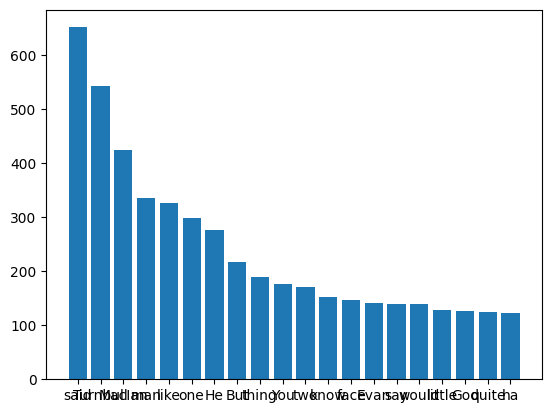

In [8]:
top_20_words = [word[0] for word in top_20]
count = [number[1] for number in top_20]
plt.bar(top_20_words, count)

#2

In [9]:
print(nltk.__version__)

3.9.1


In [13]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/anthonyzakszewski/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [23]:
sentences = gutenberg.sents('chesterton-ball.txt')
sent_str = []
for sentence in sentences:
    x = ' '.join(sentence)
    sent_str.append(x)

for sentence in sent_str:
    sid = SentimentIntensityAnalyzer()
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print(k, ss[k])
    print()

#https://www.nltk.org/howto/sentiment.html taken idea from this

[ The Ball and The Cross by G . K . Chesterton 1909 ]
compound 0.0
neg 0.0
neu 1.0
pos 0.0

I .
compound 0.0
neg 0.0
neu 0.0
pos 0.0

A DISCUSSION SOMEWHAT IN THE AIR
compound 0.0
neg 0.0
neu 1.0
pos 0.0

The flying ship of Professor Lucifer sang through the skies like a silver arrow ; the bleak white steel of it , gleaming in the bleak blue emptiness of the evening .
compound -0.1027
neg 0.092
neu 0.828
pos 0.08

That it was far above the earth was no expression for it ; to the two men in it , it seemed to be far above the stars .
compound -0.296
neg 0.081
neu 0.919
pos 0.0

The professor had himself invented the flying machine , and had also invented nearly everything in it .
compound 0.0
neg 0.0
neu 1.0
pos 0.0

Every sort of tool or apparatus had , in consequence , to the full , that fantastic and distorted look which belongs to the miracles of science .
compound 0.2263
neg 0.095
neu 0.777
pos 0.127

For the world of science and evolution is far more nameless and elusive and like a

In [39]:
id = SentimentIntensityAnalyzer()
neg_scores = [(sentence, sid.polarity_scores(sentence)['neg']) for sentence in sent_str]
#refers to the poliarty scores in the sentence pulling the negative from it for sentences in the string
def get_negative_score(item):
    return item[1]
neg_scores = sorted(neg_scores, key=get_negative_score, reverse=True)
top_negative_sentences = neg_scores[:5]
print(top_negative_sentences)

#https://thepythonguru.com/python-builtin-functions/sorted/ used this to get the idea of the key

[('Murder !', 1.0), ('he cried , trembling .', 0.836), ('Murder !"', 0.833), ('THE IDIOT', 0.767), ('I \' m a lunatic ."', 0.762)]


In [40]:
pos_scores = [(sentence, sid.polarity_scores(sentence)['pos']) for sentence in sent_str]
def get_positive_score(item):
    return item[1]
pos_scores = sorted(pos_scores, key=get_positive_score, reverse=True)
top_positive_sentences = pos_scores[:5]
print(top_positive_sentences)

[('" Ha !', 1.0), ('" Yes , yes .', 1.0), ('" Help !', 1.0), ('Help !', 1.0), ('Ha !', 1.0)]


In [41]:
neutral_scores = [(sentence, sid.polarity_scores(sentence)['neu']) for sentence in sent_str]
def get_neutral_score(item):
    return item[1]
neutral_scores = sorted(neutral_scores, key=get_neutral_score, reverse=True)
top_neutral_sentences = neutral_scores[:5]
print(top_neutral_sentences)

[('[ The Ball and The Cross by G . K . Chesterton 1909 ]', 1.0), ('A DISCUSSION SOMEWHAT IN THE AIR', 1.0), ('The professor had himself invented the flying machine , and had also invented nearly everything in it .', 1.0), ('All these things , as I say , the professor had invented ; he had invented everything in the flying ship , with the exception , perhaps , of himself .', 1.0), ('There was , however , another man on board , so to speak , at the time .', 1.0)]


#3

I would say that some of these scores are correct, like I feel the negative and the nuetral scores are good, but I feel that the postive scores are taken from the idea that if there is an exclamation mark, then it considers it more positive which isn't all true as one of the top positive scores is for the word help. 